In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics.pairwise import euclidean_distances

# Cargar el dataset localmente
df = pd.read_csv('Mall_Customers.csv')  # Asegúrate de que el archivo está en la misma carpeta que tu notebook
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


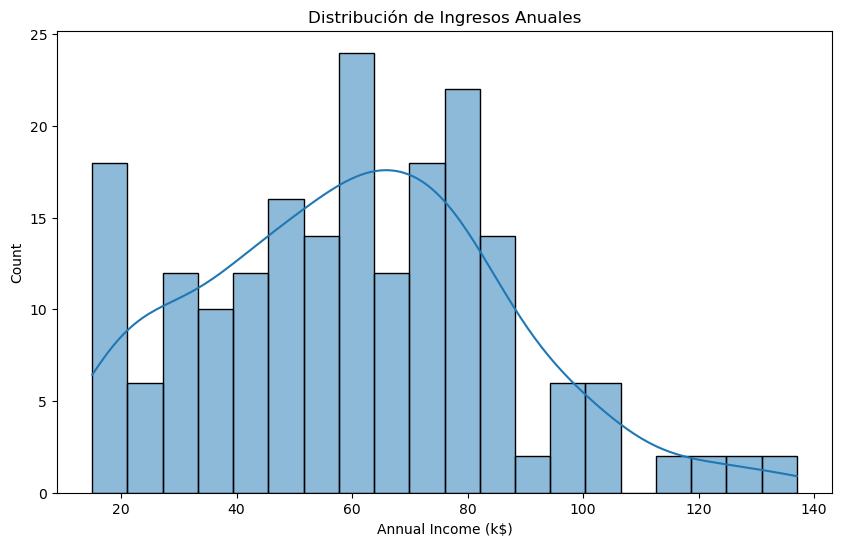

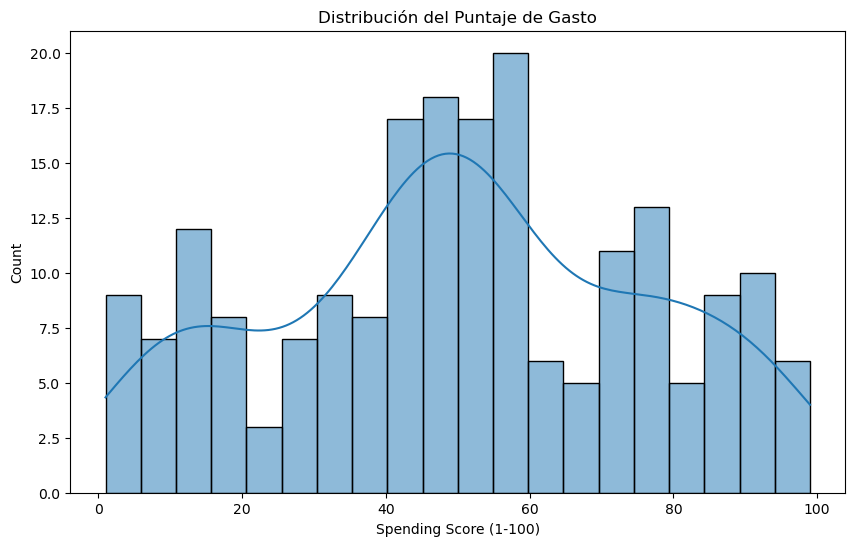

In [3]:
# Información del dataset
df.info()

# Descripción estadística
df.describe()

# Visualización de la distribución de las variables
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribución de Ingresos Anuales')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribución del Puntaje de Gasto')
plt.show()


In [5]:
# Eliminar columnas irrelevantes
df = df.drop(['CustomerID'], axis=1)

# Codificar la variable categórica 'Gender'
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Escalar las características
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Convertir a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)


C:\Users\jeanc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.27191023466188324
Calinski-Harabasz Index: 62.12634193286723
Davies-Bouldin Index: 1.1810914524061709


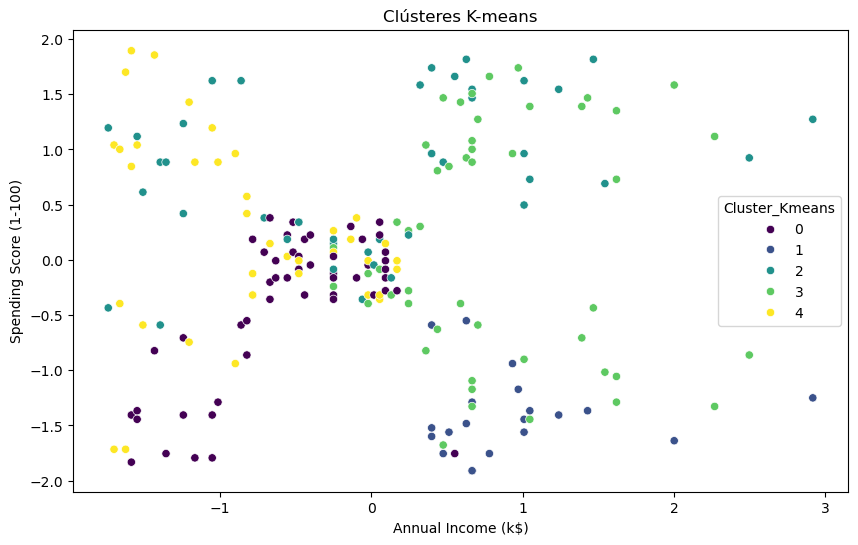

In [7]:
# Definir el modelo K-means y entrenar
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df)

# Predicciones y añadir al DataFrame
df['Cluster_Kmeans'] = kmeans.labels_

# Evaluación del modelo
silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
calinski_harabasz_avg = calinski_harabasz_score(scaled_df, kmeans.labels_)
davies_bouldin_avg = davies_bouldin_score(scaled_df, kmeans.labels_)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

# Visualización de los clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_df['Annual Income (k$)'], y=scaled_df['Spending Score (1-100)'], hue=df['Cluster_Kmeans'], palette='viridis')
plt.title('Clústeres K-means')
plt.show()


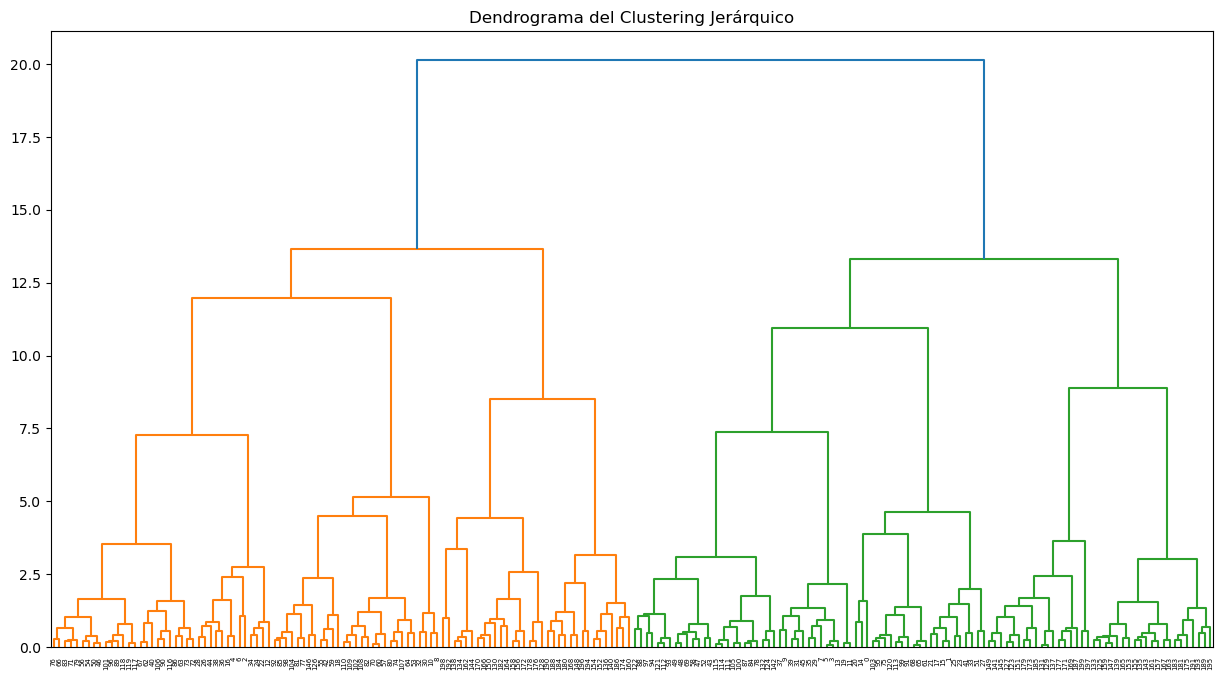

Silhouette Score (Jerárquico): 0.28699413201651747
Calinski-Harabasz Index (Jerárquico): 64.46870730105833
Davies-Bouldin Index (Jerárquico): 1.2197730790225612


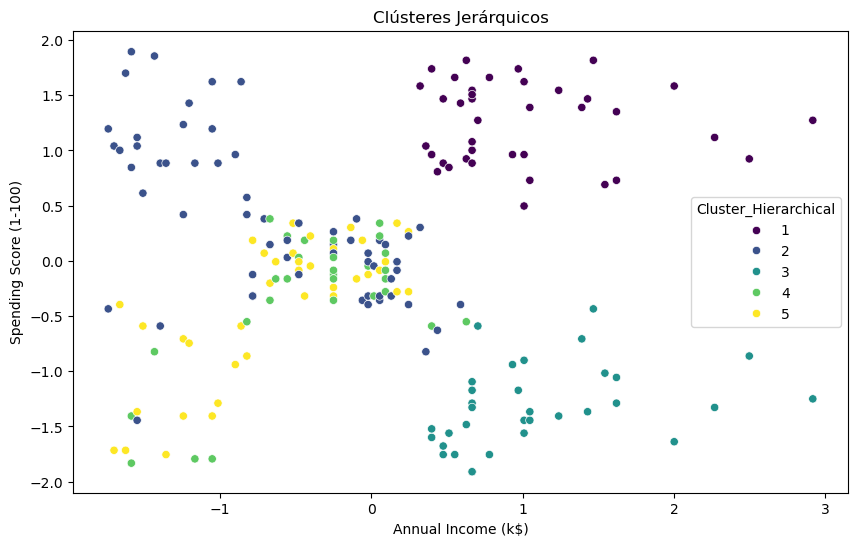

In [9]:
# Definir el modelo de clustering jerárquico
linked = linkage(scaled_df, method='ward')

# Dendrograma
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma del Clustering Jerárquico')
plt.show()

# Determinar clústeres
df['Cluster_Hierarchical'] = fcluster(linked, t=5, criterion='maxclust')

# Evaluación del modelo
silhouette_avg_h = silhouette_score(scaled_df, df['Cluster_Hierarchical'])
calinski_harabasz_avg_h = calinski_harabasz_score(scaled_df, df['Cluster_Hierarchical'])
davies_bouldin_avg_h = davies_bouldin_score(scaled_df, df['Cluster_Hierarchical'])

print(f'Silhouette Score (Jerárquico): {silhouette_avg_h}')
print(f'Calinski-Harabasz Index (Jerárquico): {calinski_harabasz_avg_h}')
print(f'Davies-Bouldin Index (Jerárquico): {davies_bouldin_avg_h}')

# Visualización de los clústeres jerárquicos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_df['Annual Income (k$)'], y=scaled_df['Spending Score (1-100)'], hue=df['Cluster_Hierarchical'], palette='viridis')
plt.title('Clústeres Jerárquicos')
plt.show()
